In [1]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Let us use the data from the slide commute example
# We'll try to predict commute time using only the distance, ignoring the day of the week
x = np.array([2.7, 4.1, 1.0, 5.2, 2.8])
y = np.array([25., 33., 15., 45., 22.])

# We'll use these quantities for the closed form solution of w
n = len(x)
x_bar = np.mean(x)
y_bar = np.mean(y)
x2_bar = np.mean(x**2)
xy_bar = np.mean(x * y)

# See the closed form solution for w1 and w0 on the slides
w1 = (xy_bar - x_bar * y_bar)/(x2_bar - x_bar ** 2)
w0 = y_bar - w1 * x_bar

# Predicted values are in yhat
yhat = w0 + w1 * x

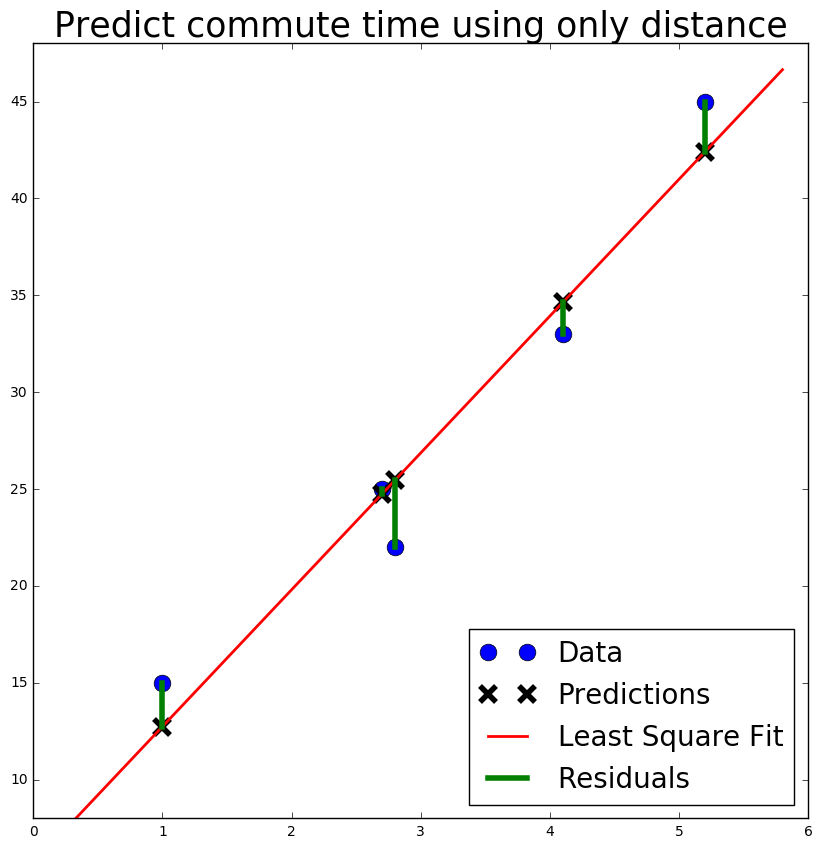

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Predict commute time using only distance', fontsize=25)

# Set axes limits to capture most of the data
xmin, xmax = (0, 6)
ymin, ymax = (8, 48)
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))


# Plot the actual data and the predictions at the corresponding points
ax.plot(x, y, ls='', markersize=12, marker='o',label='Data')
ax.plot(x, yhat, ls='', markersize=12, c='k', marker='x', markeredgewidth=4, label='Predictions')

# Plot the entire least square fit line
ax.plot([xmin + 0.2, xmax - 0.2], [w0 + w1 * (xmin + 0.2), w0 + w1*(xmax - 0.2)], c='r', lw='2', label='Least Square Fit')

# Plot the residuals 
for i in range(n):
    # We'll only add a label to the first line to get a useful legend
    residual_label = None
    if i == 0: residual_label = 'Residuals'
    ax.plot([x[i], x[i]], [yhat[i], y[i]], c='green', ls='-', lw=4, label=residual_label)
    
ax.legend(loc='lower right', fontsize=20)

plt.show()